<a href="https://colab.research.google.com/github/shcho11/00.ML_Practices_2022_KB/blob/main/DecisionTreeRegressorModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# 보스턴 집값 데이터 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_boston

In [3]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# 데이터 분할

# 훈련셋과 테스트셋 분리
# 데이터 분할
from sklearn.model_selection import train_test_split

x = df.drop(columns="MEDV")
y = df["MEDV"]

feature_names = x.columns
labels = y.unique()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [7]:
# 모델 import
from sklearn.tree import DecisionTreeRegressor

In [8]:
# 모델 생성
model = DecisionTreeRegressor(max_depth = 3, random_state = 42)

In [9]:
# 모델 학습
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [10]:
# 모델 예측
y_predict = model.predict(x_test)
y_predict

array([22.98678161, 22.98678161, 12.26612903, 22.98678161, 17.81538462,
       22.98678161, 17.81538462, 12.26612903, 22.98678161, 22.98678161,
       17.81538462, 17.81538462, 12.26612903, 22.98678161, 22.98678161,
       33.22162162, 12.26612903, 12.26612903, 45.62727273, 17.81538462,
       22.98678161, 22.98678161, 17.81538462, 22.98678161, 12.26612903,
       17.81538462, 22.98678161, 17.81538462, 17.81538462, 22.98678161,
       17.81538462, 22.98678161, 33.22162162, 22.98678161, 17.81538462,
       12.26612903, 33.22162162, 22.98678161, 17.81538462, 22.98678161,
       17.81538462, 22.98678161, 45.62727273, 22.98678161, 22.98678161,
       12.26612903, 17.81538462, 22.98678161, 17.81538462, 22.98678161,
       22.98678161, 33.22162162, 17.81538462, 22.98678161, 45.62727273,
       22.98678161, 12.26612903, 22.98678161, 22.98678161, 17.81538462,
       22.98678161, 33.22162162, 22.98678161, 22.98678161, 22.98678161,
       17.81538462, 12.26612903, 22.98678161, 22.98678161, 17.81

In [12]:
# 모델 평가지표 출력
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)

print("r2 score : ",r2)
print("mean squred error : ",mse)
print("mean absolute error ",mae)

r2 score :  0.7435711616336518
mean squred error :  19.10730653954883
mean absolute error  3.4432455671681645


<BarContainer object of 13 artists>

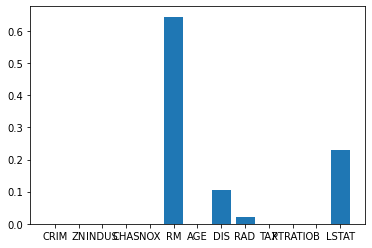

In [13]:
# feature importance
plt.bar(x.columns, model.feature_importances_)